In [1]:
### Titanic Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

titanic = sns.load_dataset("titanic")

### import necessary packages
### load the Titanic dataset from seaborn

In [2]:
### Titanic Data

titanic.head(20)

### showing 20 lines

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### survived: 
0 = No, 1 = Yes


### pclass (Ticket class): 
1 = upper, 2 = middle, 3 = lower


### sibsp (# of siblings (brother, sister, stepbrother, stepsister) / spouses (husband, wife) aboard the Titanic)



### parch (# of parents / children aboard the Titanic): 
Parent = mother, father. 

Child = daughter, son, stepdaughter, stepson. 

Some children travelled only with a nanny, therefore parch=0 for them.


### embarked (Port of Embarkation):	
C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
### Titanic Data

titanic.info()

### showing the columns & data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
### Titanic Data

missing_values = titanic.isnull().sum()

print(missing_values[missing_values > 0]) 

#### check for missing values

age            177
embarked         2
deck           688
embark_town      2
dtype: int64


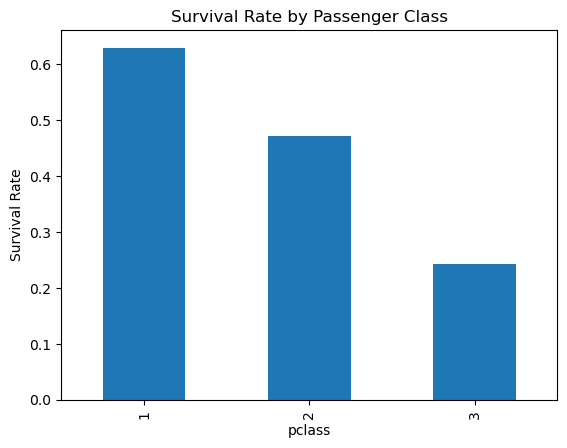

In [10]:
## Good Visualizations 

survival_rate_class = titanic.groupby('pclass')['survived'].mean()
survival_rate_class.plot(kind='bar', title="Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

### Survival Rate by Passenger Class (Bar Chart)

### Why it’s good: It accurately displays the distribution of survival rates across different passenger classes (1st, 2nd, 3rd). A bar chart is clear and makes it easy to compare these categories.
### Visualization: A simple bar plot comparing the survival rates across each class.

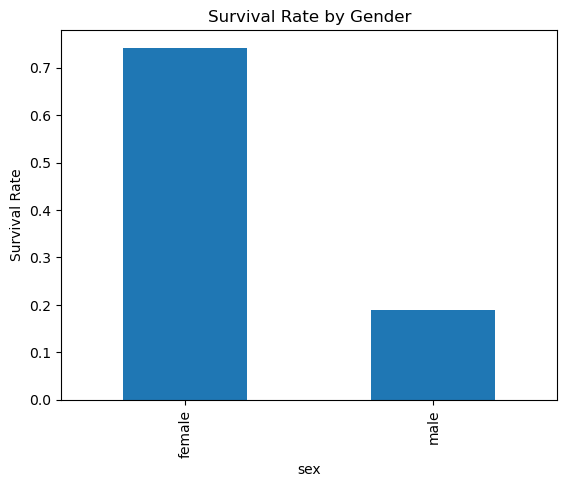

In [12]:
## Good Visualizations 

survival_rate_gender = titanic.groupby('sex')['survived'].mean()
survival_rate_gender.plot(kind='bar', title="Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

### Survival Rate by Gender (Stacked Bar Chart or Grouped Bar Chart)

### Why it’s good: This shows the survival rates for men and women, which are clearly distinguishable and highlights the difference in survival between the two genders.
### Visualization: Stacked bar or grouped bar chart to show survival rates for males and females.

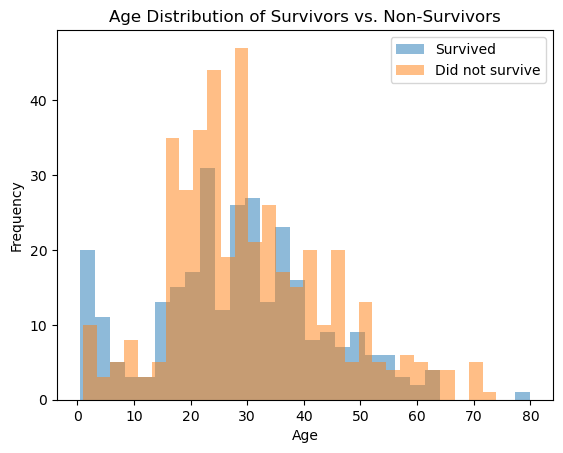

In [14]:
## Good Visualizations 

plt.hist(titanic[titanic['survived'] == 1]['age'], bins=30, alpha=0.5, label='Survived')
plt.hist(titanic[titanic['survived'] == 0]['age'], bins=30, alpha=0.5, label='Did not survive')
plt.legend()
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Age Distribution of Survivors vs. Non-Survivors (Histogram)

### Why it’s good: A histogram for comparing the distribution of ages of survivors and non-survivors helps in visually identifying age-related patterns in survival.
### Visualization: Two histograms (one for survivors and one for non-survivors) overlaid or side by side.

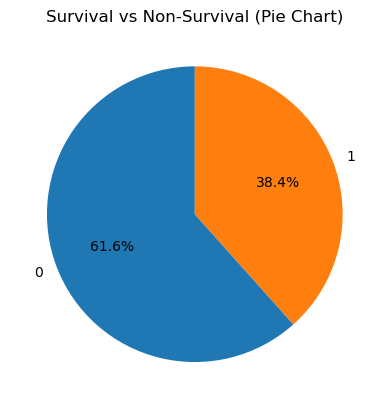

In [18]:
## Bad Visualizations  

titanic['survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Survival vs Non-Survival (Pie Chart)")
plt.ylabel("")
plt.show()

### Pie Chart for Survival vs. Non-Survival

### Why it’s bad: Pie charts are not effective for comparing multiple categories in a dataset, especially when the difference in size is subtle. A pie chart could make it difficult to perceive accurate proportions for survival versus non-survival.
### Visualization Issue: A pie chart with very small sections for non-survival, which exaggerates the idea that most people survived.

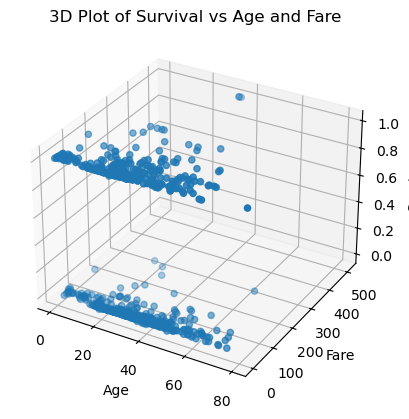

In [20]:
## Bad Visualizations  

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(titanic['age'], titanic['fare'], titanic['survived'])
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Survived')
ax.set_title("3D Plot of Survival vs Age and Fare")
plt.show()

### Using a 3D Plot for Survival vs. Age

### Why it’s bad: 3D plots can be hard to interpret, and in some cases, they can mislead viewers into seeing patterns that aren't really there. They add unnecessary complexity.
### Visualization Issue: Using 3D plots to show survival rates versus age can obscure the data and make it harder to understand the key trends.

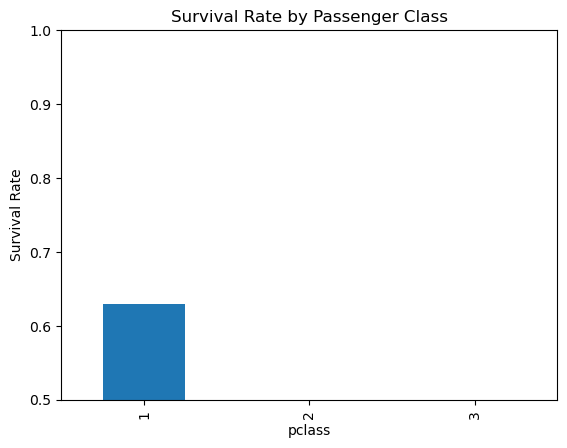

In [22]:
## Bad Visualizations  

survival_rate_class.plot(kind='bar', title="Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.ylim(0.5, 1)  # Manipulated Y-axis range
plt.show()

### Distorted Bar Charts with Manipulated Y-Axis

### Why it’s bad: Altering the range of the Y-axis can exaggerate or downplay differences between categories. A Y-axis that starts at a value other than 0 (or has a misleading scale) can mislead viewers into thinking the data shows a bigger difference than it actually does.
### Visualization Issue: If you manipulate the Y-axis range, the differences in survival rates might appear exaggerated.

In [ ]:
## Bad Visualizations  

titanic[titanic['pclass'] == 1]['survived'].value_counts().plot(kind='bar', title="Survival Rate for 1st Class")
plt.show()

### Cherry-Picking Data

### Why it’s bad: Selecting only a small, unrepresentative subset of the data (e.g., only looking at passengers from one class) can mislead the audience about trends in the full dataset.
### Visualization Issue: If you create a chart that only shows survival rates for a specific class (e.g., 1st class), you might mislead viewers into thinking that only that class had high survival rates.